# Import Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# reading data 
heart_data=pd.read_csv('heart.csv') 
#viewing first five rows
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#diplaying no. of rows and columns in the data
print("no. of rows:\n",heart_data.shape[0],
      "\nno. of columns:\n", heart_data.shape[1])

no. of rows:
 303 
no. of columns:
 14


In [7]:
# checking for null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
heart_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [13]:
heart_data.drop_duplicates(keep='first',inplace=True)

In [15]:
print('\nNumber of rows are\n', heart_data.describe())


Number of rows are
              age         sex          cp      trtbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.5260

# EDA

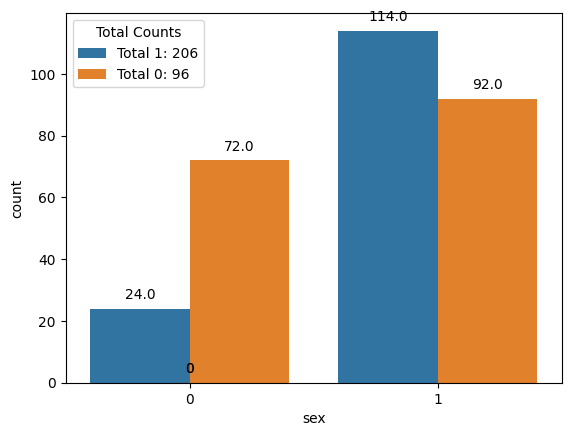

In [18]:
# calculates the occurance of each unique value in the 'sex' column
sex_counts = heart_data['sex'].value_counts()
# Create a countplot for heart failure based on sex
p = sns.countplot(data=heart_data, x="sex", hue="output")
# Display the count values on top of the bars
for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Display the total number of each sex in the legend
p.legend(title='Total Counts', labels=[f'Total {i}: {count}' for i, count in sex_counts.items()])

# Show the plot
plt.show()

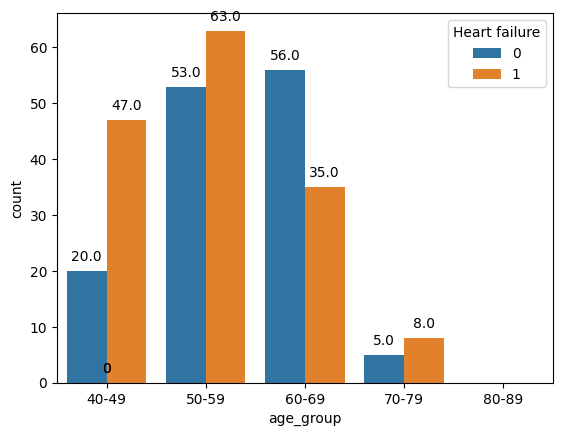

In [20]:
# Create age groups
bins = [40, 49, 59, 69, 79]
labels = ['40-49', '50-59', '60-69', '70-79', '80-89']
heart_data['age_group'] = pd.cut(heart_data['age'], bins=bins + [float('inf')], labels=labels, right=False)

# Create a countplot for heart failure based on age groups
p = sns.countplot(data=heart_data, x="age_group", hue="output", order=labels)

# Display the count values on top of the bars
for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
p.legend(title='Heart failure', loc='upper right')

# Show the plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16616\990907293.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y='chol', data=heart_data, ax=axes[0], palette='Set2')


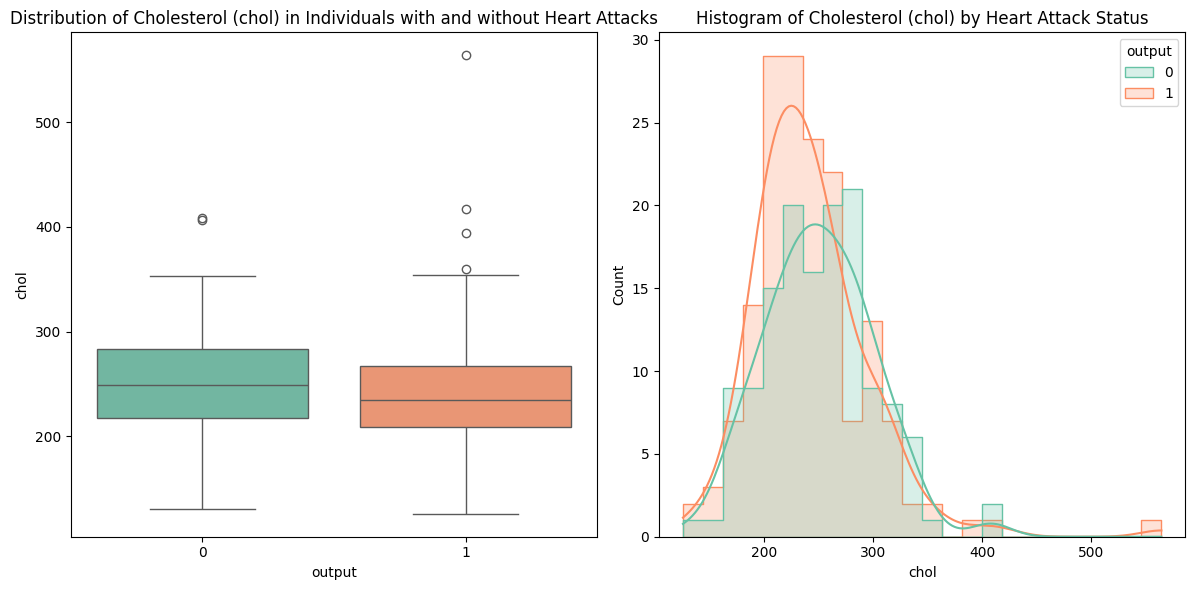

In [22]:
#distribution analysis of blood pressure (trtbps) and cholesterol (chol) in individuals with and without heart attacks

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for Cholesterol (chol)
sns.boxplot(x='output', y='chol', data=heart_data, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Cholesterol (chol) in Individuals with and without Heart Attacks')

# Histogram for Cholesterol (chol)
sns.histplot(data=heart_data, x='chol', hue='output', kde=True, ax=axes[1], palette='Set2', element="step", common_norm=False)
axes[1].set_title('Histogram of Cholesterol (chol) by Heart Attack Status')

# Adjust layout
plt.tight_layout()
plt.show()


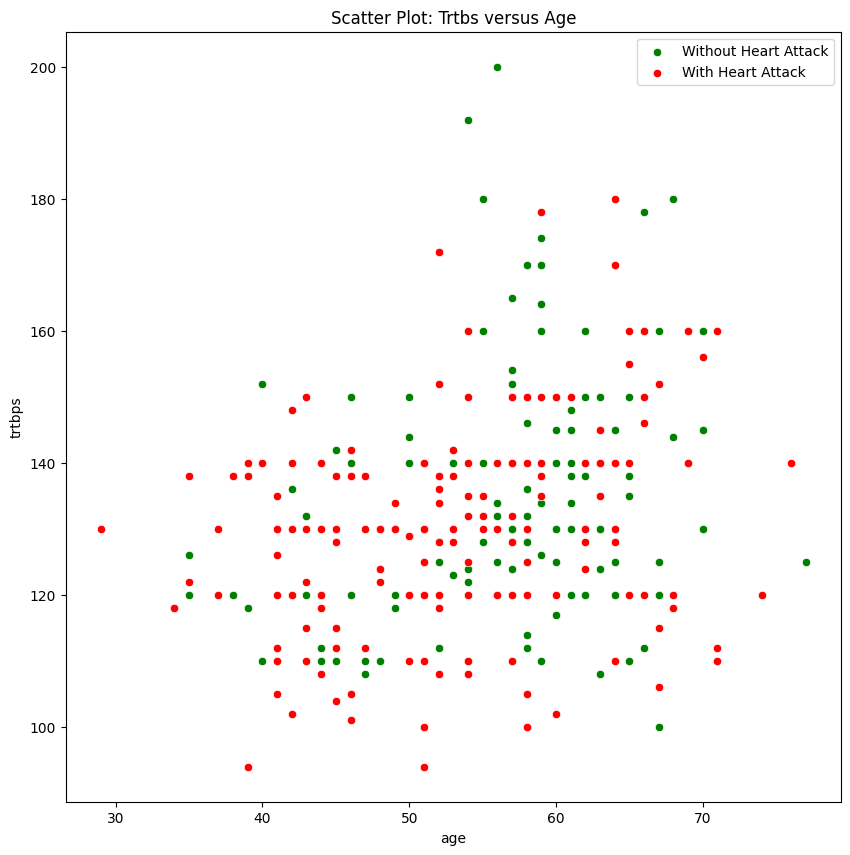

In [24]:
#visualizing impact of resting blood pressure and age on risks of heart attack
plt.figure(figsize=(10, 10))

# Scatter plot for individuals without heart attacks
sns.scatterplot(x='age', y='trtbps', data=heart_data[heart_data['output'] == 0], color='green', label='Without Heart Attack')

# Scatter plot for individuals with heart attacks
sns.scatterplot(x='age', y='trtbps', data=heart_data[heart_data['output'] == 1], color='red', label='With Heart Attack')

plt.title('Scatter Plot: Trtbs versus Age')
plt.legend()
plt.show()

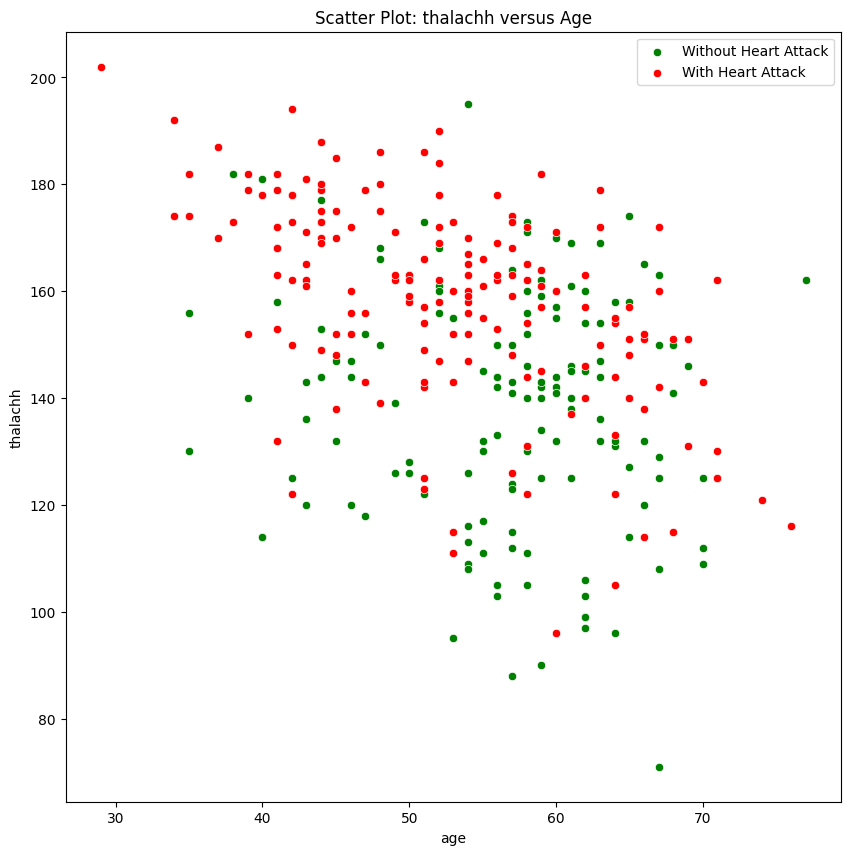

In [26]:
#Age vs. maximum heart rate achieved during exercise (thalachh)
plt.figure(figsize=(10, 10))

# Scatter plot for individuals without heart attacks
sns.scatterplot(x='age', y='thalachh', data=heart_data[heart_data['output'] == 0], color='green', label='Without Heart Attack')

# Scatter plot for individuals with heart attacks
sns.scatterplot(x='age', y='thalachh', data=heart_data[heart_data['output'] == 1], color='red', label='With Heart Attack')

plt.title('Scatter Plot: thalachh versus Age')
plt.legend()
plt.show()


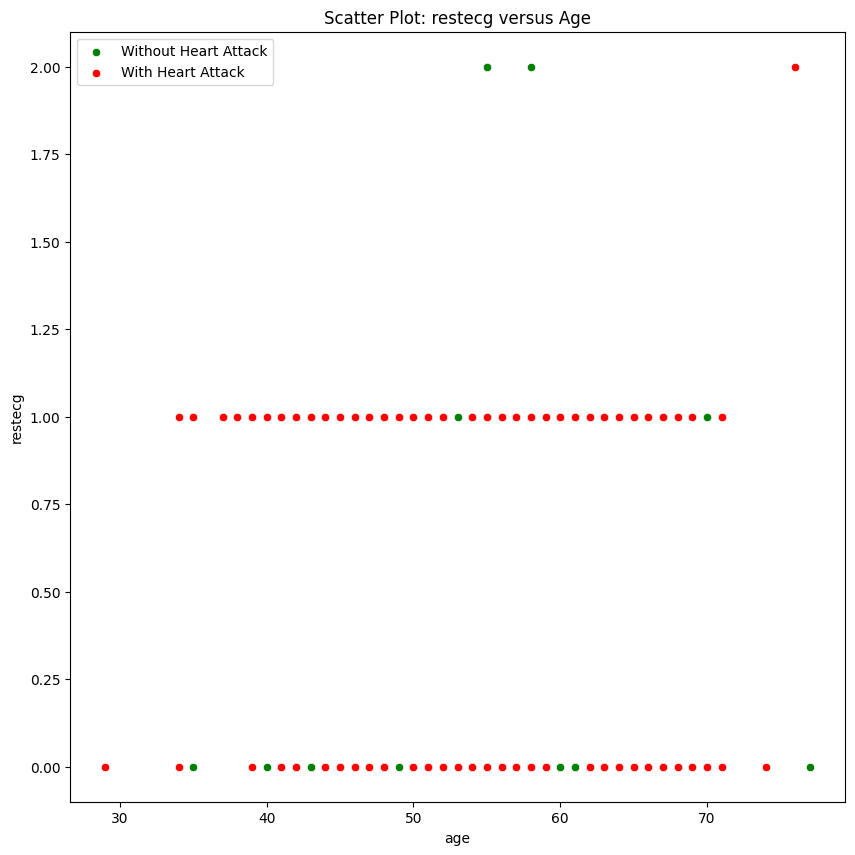

In [28]:
#Age vs.  Resting Electrocardiographic Results (restecg)
plt.figure(figsize=(10, 10))

# Scatter plot for individuals without heart attacks
sns.scatterplot(x='age', y='restecg', data=heart_data[heart_data['output'] == 0], color='green', label='Without Heart Attack')

# Scatter plot for individuals with heart attacks
sns.scatterplot(x='age', y='restecg', data=heart_data[heart_data['output'] == 1], color='red', label='With Heart Attack')

plt.title('Scatter Plot: restecg versus Age')
plt.legend()
plt.show()


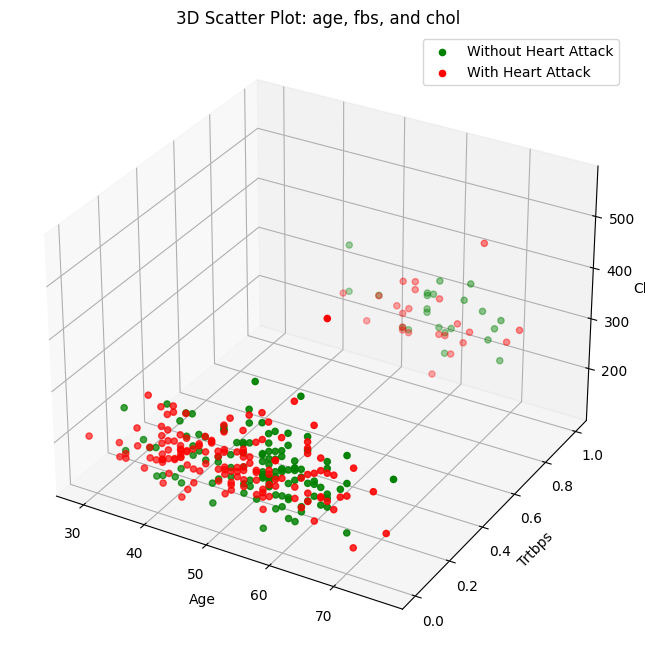

In [30]:
#figure (plotting area) with a specified size of 12 by 8 inches 
plt.figure(figsize=(12, 8)) 

# 3D scatter plot for individuals without heart attacks. The variable ax is 
#then assigned the 3D axes for subsequent plotting.
ax = plt.axes(projection='3d')
'''
This line creates a 3D scatter plot for individuals without heart attacks. 
It uses ax.scatter3D to plot points in 3D space, with the x-axis representing
'age', the y-axis representing 'fbs' (fasting blood sugar), and the z-axis 
representing 'chol' (cholesterol). The points are plotted in green, and a 
label 'Without Heart Attack' is assigned for this category.
'''
ax.scatter3D(heart_data[heart_data['output'] == 0]['age'], 
             heart_data[heart_data['output'] == 0]['fbs'], 
             heart_data[heart_data['output'] == 0]['chol'], 
             color='green', label='Without Heart Attack')

# 3D scatter plot for individuals with heart attacks
ax.scatter3D(heart_data[heart_data['output'] == 1]['age'], 
             heart_data[heart_data['output'] == 1]['fbs'], 
             heart_data[heart_data['output'] == 1]['chol'], 
             color='red', label='With Heart Attack')

ax.set_xlabel('Age')
ax.set_ylabel('Trtbps')
ax.set_zlabel('Chol')
ax.set_title('3D Scatter Plot: age, fbs, and chol')

plt.legend()
plt.show()

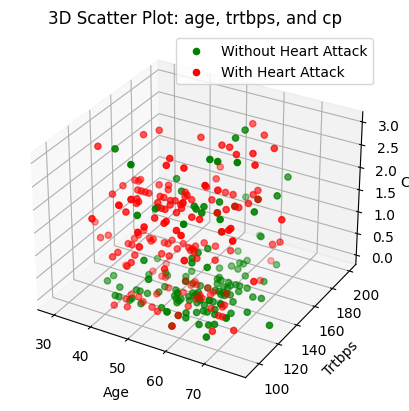

In [32]:
# 3D scatter plot showing the relationship between age, resting bloold pressure and chest pain
ax = plt.axes(projection='3d')
ax.scatter3D(heart_data[heart_data['output'] == 0]['age'], 
             heart_data[heart_data['output'] == 0]['trtbps'], 
             heart_data[heart_data['output'] == 0]['cp'], 
             color='green', label='Without Heart Attack')

# 3D scatter plot for individuals with heart attacks
ax.scatter3D(heart_data[heart_data['output'] == 1]['age'], 
             heart_data[heart_data['output'] == 1]['trtbps'], 
             heart_data[heart_data['output'] == 1]['cp'], 
             color='red', label='With Heart Attack')

ax.set_xlabel('Age')
ax.set_ylabel('Trtbps')
ax.set_zlabel('Chol')
ax.set_title('3D Scatter Plot: age, trtbps, and cp')

plt.legend()
plt.show()

In [34]:
print("Column Names:", list(heart_data.columns))

Column Names: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'age_group']



correlation: 
                age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trtbps    0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalachh -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exng      0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slp      -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
caa       0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thall     0.065317  0.211452 -0.160370  0.062870

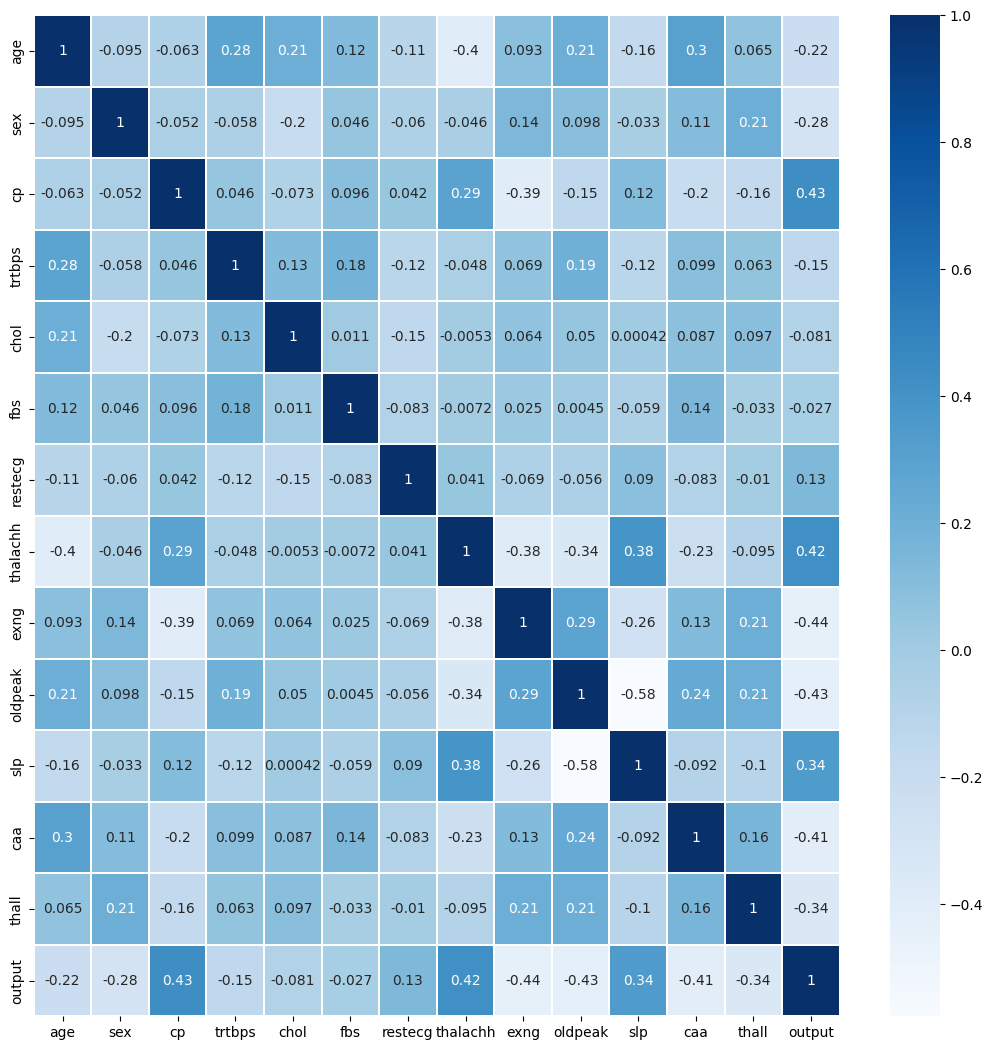

In [36]:
#Identifying highly correlated featrues
#first drop age_group column. It is not part of actual data
heart_data.drop('age_group', axis=1, inplace=True)
#create correlation among all features
corr=heart_data.corr()
#displaying correlation in text form
print('\ncorrelation: \n', corr)
#creating figure of 13*13 inches
plt.figure(figsize=(13,13))
#creating heatmap using seaborn library to visualize correlation between the features
sns.heatmap(corr,annot=True,cmap="Blues",linewidths=0.2)
plt.show()

In [38]:
# So drop oldpeak column
heart_data.drop('oldpeak', axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16616\3256781175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_data, ax=axes[i], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_16616\3256781175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_data, ax=axes[i], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_16616\3256781175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y=feature, data=heart_data, ax=axes[i], palette='virid

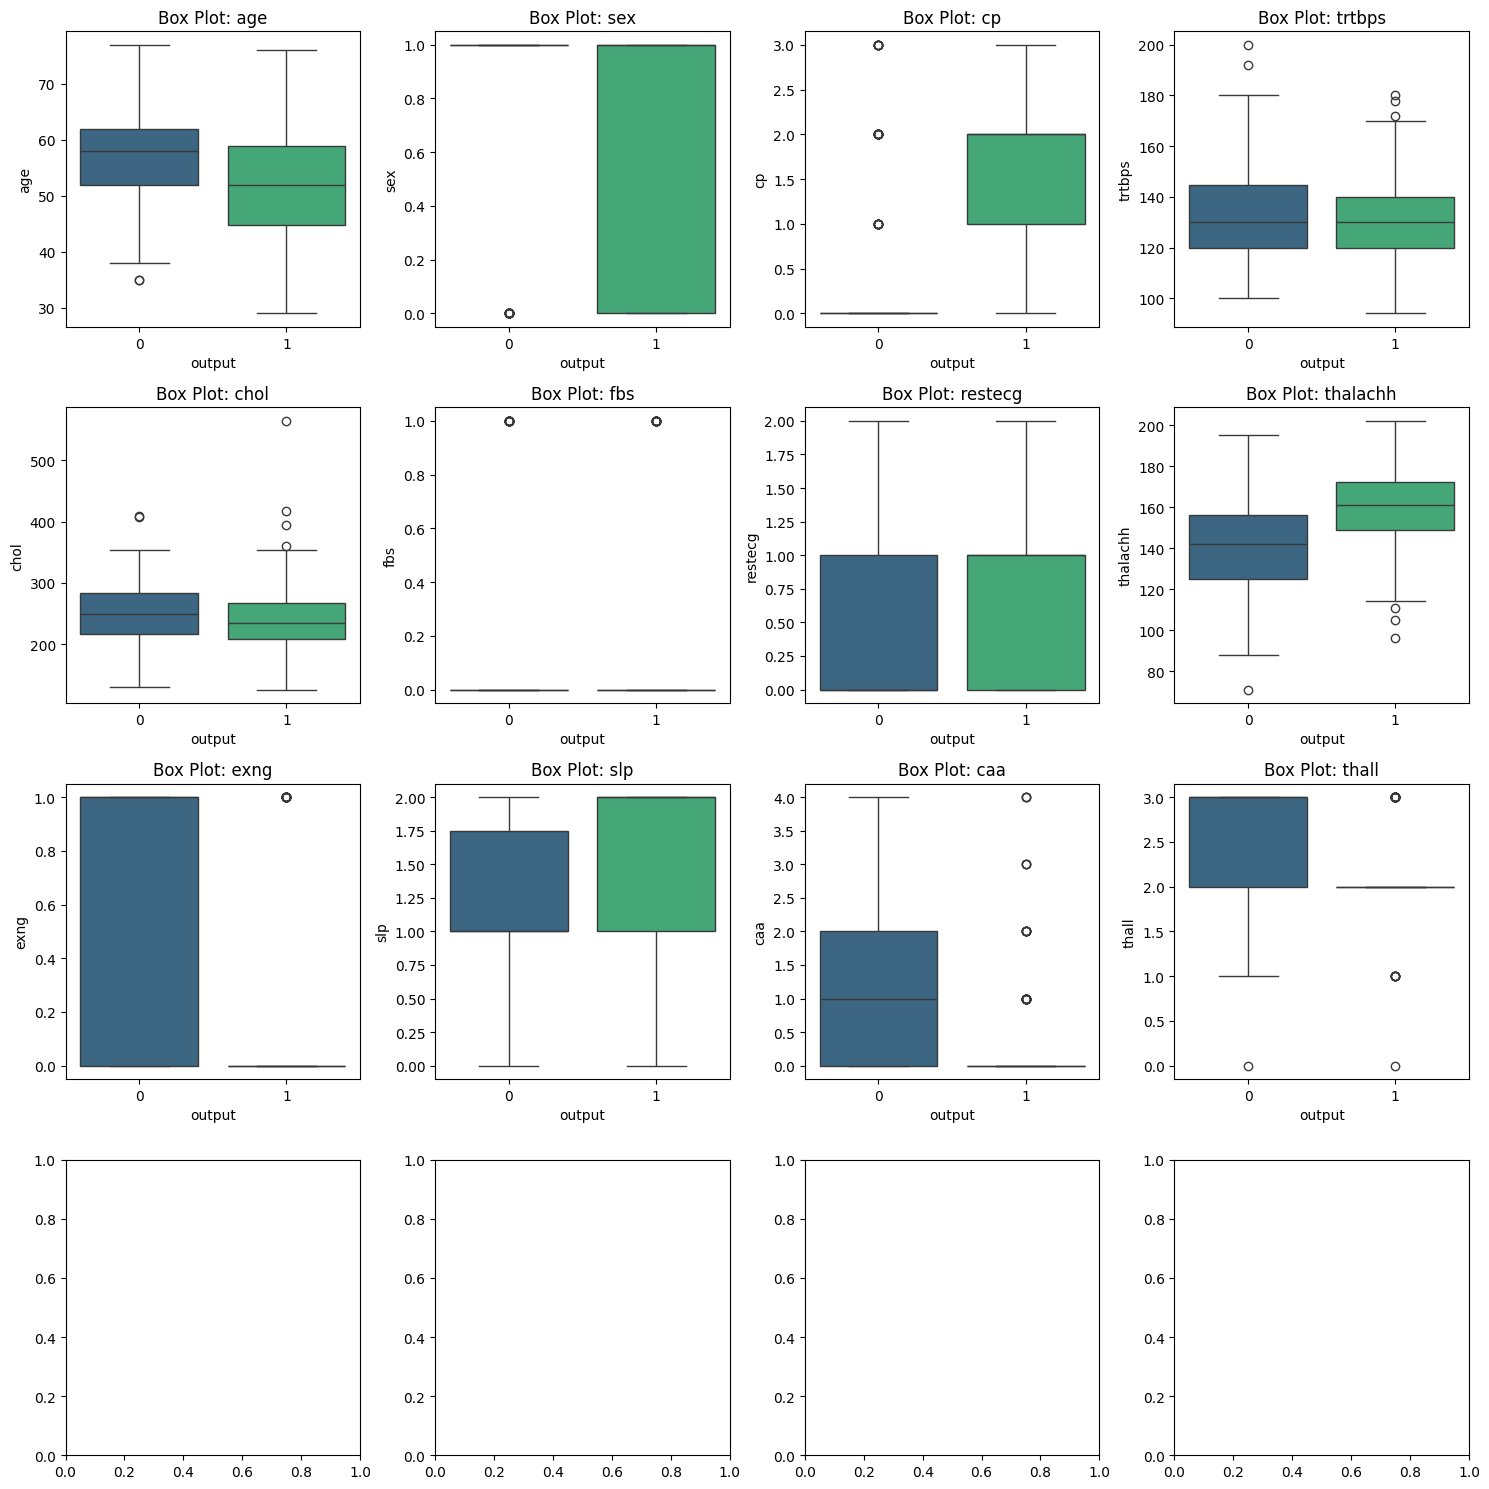

In [40]:
#Identifying outliers using box plots
# Set up a grid for subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# List of features, extracting all features excluding the target variable i.e. output
features = list(heart_data.columns[:-1])

# Flatten the 2D array of subplots
# flatten applied to a NumPy array of Axes objects, useful for multiple subplots arranged in a grid (like a 2D array of subplots) 
#and you want to iterate over them.
axes = axes.flatten()

# Iterate over each feature and create box plots
for i, feature in enumerate(features):
    sns.boxplot(x='output', y=feature, data=heart_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Box Plot: {feature}')

# Adjust layout
plt.tight_layout()#adjusting layout of the subplots to prevent overlap.
plt.show()

In [42]:
#as shown by the box plots, features with outliers have been put in a separate variable
features_to_transform=['trtbps', 'chol', 'restecg', 'thalachh' ]
#itervating over each features with outliers
for feature in features_to_transform:
    #computing the 25th percentile (first quartile) of the selected feature
    quantile1=heart_data[feature].quantile(0.25)
    #computing the 75th percentile (third quartile) of the same feature.
    quantile2=heart_data[feature].quantile(0.75)
    #Replacing Values Outside IQR: 
    #the np.where() function replaces values in the selected feature that are below quantile1 with quantile1.
    #Thus truncating values that fall outside the interquartile range (IQR), i.e, difference between the third and first quartiles (Q3 - Q1).
    heart_data[feature]=np.where(heart_data[feature]<quantile1,quantile1,heart_data[feature])
    #the np.where() function replaces values in the selected feature that are above quantile2 with quantile2.
    heart_data[feature]=np.where(heart_data[feature]>quantile2,quantile2,heart_data[feature])

In [44]:
# Some times preprocessing causes NaN or infinity values in data so check for missing values (NaN)
missing_values = heart_data.isnull().sum()
print("Missing Values (NaN):")
print(missing_values)

# Check for infinity values
infinity_values = heart_data.isin([np.inf, -np.inf]).sum()
print("\nInfinity Values:")
print(infinity_values)
#filling missing values with dataframe mean
heart_data.fillna(heart_data.mean(), inplace=True)

Missing Values (NaN):
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
slp         0
caa         0
thall       0
output      0
dtype: int64

Infinity Values:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [46]:
# creating an instance of the StandardScaler class from scikit-learn. 
#this helps standardizing features by scaling them to unit variance.
scaler = StandardScaler()
features_to_scale=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 
            'exng', 'slp', 'caa', 'thall']
# fitting the scaler on the features and transforming the data. This involves two steps: 
# 1. Fit: here mean and standard deviation are computed  for each feature.
# 2. Transform: Here featrues are Standardizing by subtracting the mean and dividing by the standard deviation.
# The standardized values are then put back to the corresponding columns in the 'heart_data' DataFrame.
heart_data[features_to_scale] = scaler.fit_transform(heart_data[features_to_scale])

In [48]:

X = heart_data.iloc[:, 1:-1].values
y = heart_data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [50]:

key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier','GaussianNB','MLPClassifier']
value = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier(),GaussianNB(),MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)]
models = dict(zip(key,value))
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = round(accuracy_score(y_test, predict),3)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.885
KNeighborsClassifier 0.885
SVC 0.934
DecisionTreeClassifier 0.721
RandomForestClassifier 0.836
GradientBoostingClassifier 0.852


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier 0.885
XGBClassifier 0.738
GaussianNB 0.836
MLPClassifier 0.852
